In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

plt.style.use("seaborn")

In [30]:
df = pd.read_csv("EvalA/COVID-19_2020.csv")

# Aufgabe 1

In [31]:
df["death_increase"] = df["weekly_count"].diff(periods=1)
df.head(2)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,death_increase
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0.0,"Epidemic intelligence, national weekly data",NaN
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.0,0.0,"Epidemic intelligence, national weekly data",0.0


In [32]:
df[df["death_increase"] == df["death_increase"].max()]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,death_increase
13075,India,IND,Asia,1380004385,cases,2807564.0,2021-17,352.439822,19925604.0,"Epidemic intelligence, national weekly data",751443.0


In [33]:
df_deaths = df.sort_values(by="death_increase", ascending=False)
df_deaths_countries = df_deaths[~df["country_code"].isnull()]

C:\Users\I550854\AppData\Local\Temp/ipykernel_7424/4027702268.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_deaths_countries = df_deaths[~df["country_code"].isnull()]


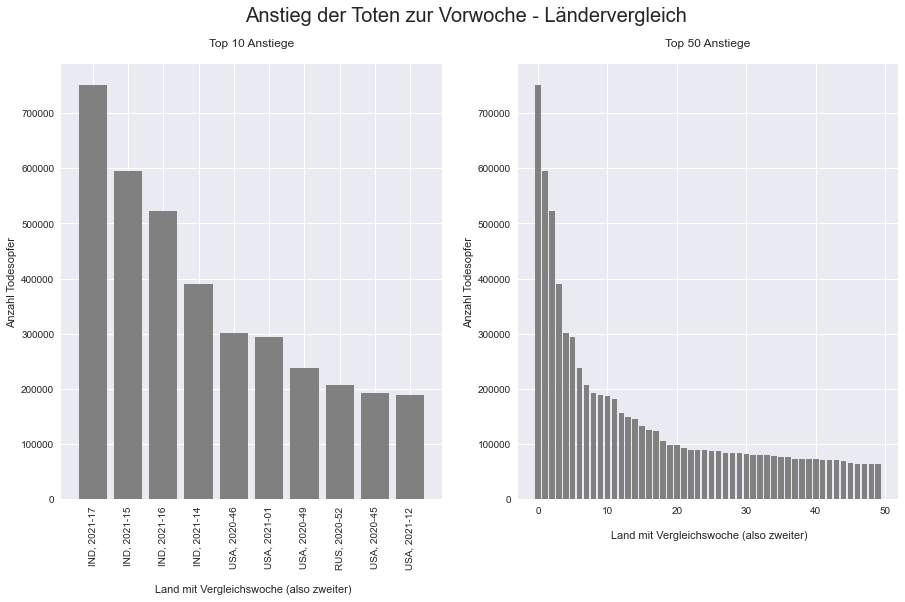

In [45]:
plt.figure(figsize=(15, 8))
plt.suptitle("Anstieg der Toten zur Vorwoche - Ländervergleich", size=20)


plt.subplot(121)
plt.title("Top 10 Anstiege\n")
plt.xlabel("\n Land mit Vergleichswoche (also zweiter)")
plt.ylabel("Anzahl Todesopfer")

plt.bar(x=range(10), height=df_deaths_countries.iloc[:10]["death_increase"], color="gray")
x_labels = [f"{c}, {w}" for c, w in list(zip(df_deaths_countries["country_code"].iloc[:10].to_list(), df_deaths_countries["year_week"].iloc[:10].to_list()))]
plt.xticks(range(10), x_labels, rotation=90)



plt.subplot(122)
plt.title("Top 50 Anstiege\n")
plt.xlabel("\n Land mit Vergleichswoche (also zweiter)")
plt.ylabel("Anzahl Todesopfer")

plt.bar(x=range(50), height=df_deaths_countries.iloc[:50]["death_increase"], color="gray")

plt.show()

In [43]:
df_deaths_countries.iloc[:10][["country_code", "year_week", "death_increase"]]

,country_code,year_week,death_increase
13075,IND,2021-17,751443.0
13073,IND,2021-15,595552.0
13074,IND,2021-16,521919.0
13072,IND,2021-14,389227.0
28057,USA,2020-46,301121.0
28065,USA,2021-01,294229.0
28060,USA,2020-49,237265.0
22479,RUS,2020-52,206627.0
28056,USA,2020-45,193092.0
28076,USA,2021-12,189000.0


# Diagramm 2

In [64]:
df["time"] = [datetime.strptime(s, "%Y-%W") for s in df["year_week"].to_list()]
df["time"].unique()

array(['2020-01-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [65]:
datetime.strptime(df["year_week"].iloc[199], "%Y-%W")

datetime.datetime(2020, 1, 1, 0, 0)

In [92]:
df_conts = df[df["country_code"].isnull()]
df_maxs = df_conts.groupby(by="year_week")[["rate_14_day", "country"]].max(numeric_only=True)
df_conts["winner"] = [1 for row in df_conts[

array(['Oceania (total)'], dtype=object)

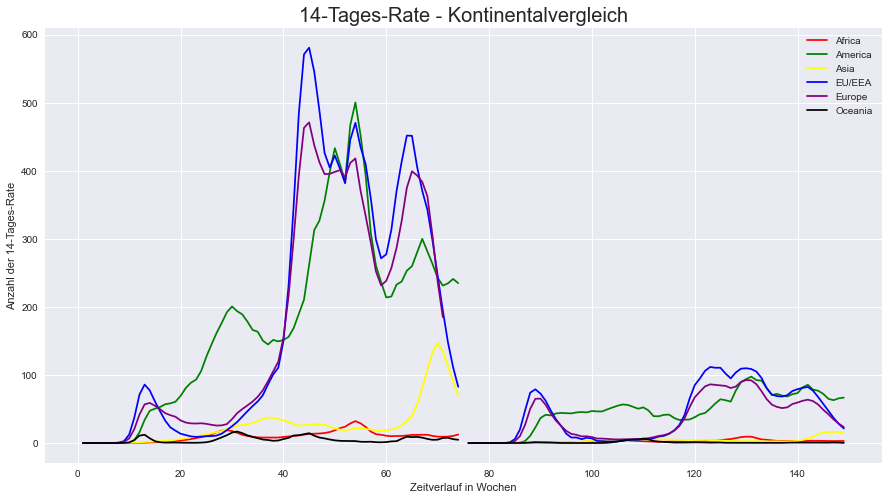

In [86]:
plt.figure(figsize=(15, 8))
plt.title("14-Tages-Rate - Kontinentalvergleich", size=20)

plt.xlabel("Zeitverlauf in Wochen")
plt.ylabel("Anzahl der 14-Tages-Rate")

plt.plot(range(len(df[df["country"] == 'Africa (total)']["year_week"])), df[df["country"] == 'Africa (total)']["rate_14_day"], color="red", label="Africa")
plt.plot(range(len(df[df["country"] == 'America (total)']["year_week"])), df[df["country"] == 'America (total)']["rate_14_day"], color="green", label="America")
plt.plot(range(len(df[df["country"] == 'Asia (total)']["year_week"])), df[df["country"] == 'Asia (total)']["rate_14_day"], color="yellow", label="Asia")
plt.plot(range(len(df[df["country"] == 'EU/EEA (total)']["year_week"])), df[df["country"] == 'EU/EEA (total)']["rate_14_day"], color="blue", label="EU/EEA")
plt.plot(range(len(df[df["country"] == 'Europe (total)']["year_week"])), df[df["country"] == 'Europe (total)']["rate_14_day"], color="purple", label="Europe")
plt.plot(range(len(df[df["country"] == 'Oceania (total)']["year_week"])), df[df["country"] == 'Oceania (total)']["rate_14_day"], color="black", label="Oceania")


plt.legend()
plt.show()

,rate_14_day
year_week,
2020-01,NaN
2020-02,0.001463
2020-03,0.004390
2020-04,0.067000
2020-05,0.416636
...,...
2021-18,246.487764
2021-19,231.317291
2021-20,234.674918


In [99]:
df_conts[df_conts["year_week"] == "2021-22"].max(numeric_only=True)

population          4.498460e+09
weekly_count        1.325323e+06
rate_14_day         2.349627e+02
cumulative_count    6.910207e+07
death_increase      1.860800e+04
dtype: float64